In [128]:
#This notebook is responsable to treat the column "Neighborhood"
import pandas as pd
import numpy as np
import seaborn as sns; sns.set() #for plot atyling
train = pd.read_csv('../data/raw/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


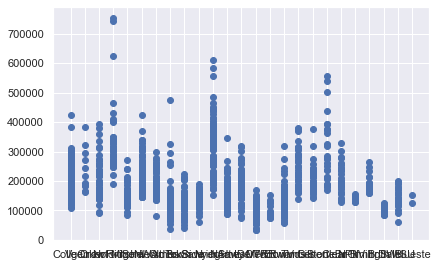

In [129]:
#Here we are plotting the data to see how is the distribution in neighborhood x sale price
import matplotlib.pyplot as plt
xs = train['Neighborhood']
ys = train['SalePrice']
plt.scatter (xs,ys)
plt.show()

In [130]:
df=train[['Neighborhood','SalePrice']]
df.head()

from sklearn.cluster import KMeans

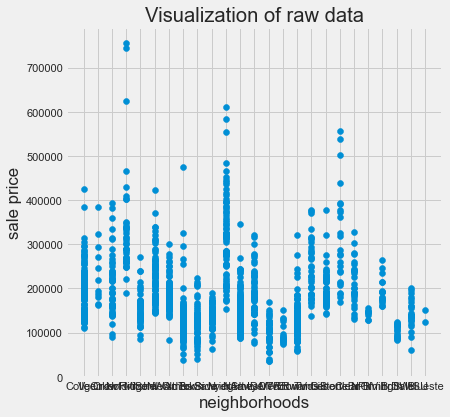

In [131]:
# Modules
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

# Import the data
df=train[['Neighborhood','SalePrice']]
df.head()

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('neighborhoods')
plt.ylabel('sale price')
plt.title('Visualization of raw data');

In [173]:
#Kmeans do not accept string as data so we are changing the classification for int variables
lista = ['NAmes','NAme','CollgCr','OldTown','Edwards','Somerst','Gilbert','NridgHt','Sawyer','NWAmes','SawyerW','BrkSide','Crawfor','Mitchel','NoRidge','Timber','IDOTRR','ClearCR','StoneBr','Blmngtn','SWISU','MeadowV','BrDale','Veenker','NPKVill','Blueste']

for index, value in enumerate(lista):
     train['Neighborhood'] = train['Neighborhood'].replace(lista, index)
        
df=train[['Neighborhood','SalePrice']]
df.head()    

,Neighborhood,SalePrice
0,2,208500
1,23,181500
2,2,223500
3,12,140000
4,14,250000


In [174]:
X = df.iloc[:, 0:2].values

In [175]:
X

array([[     2, 208500],
       [    23, 181500],
       [     2, 223500],
       ...,
       [    12, 266500],
       [     0, 142125],
       [     4, 147500]], dtype=int64)

In [176]:
kmeans = KMeans(n_clusters = 3, init = 'random')

In [177]:
kmeans.fit(X)

KMeans(init='random', n_clusters=3)

In [178]:
#This code make a count for the best cluster centers as we specified 
kmeans.cluster_centers_

array([[7.96125461e+00, 2.15004371e+05],
       [6.76566416e+00, 1.28944190e+05],
       [1.00583333e+01, 3.72625942e+05]])

In [179]:
distance = kmeans.fit_transform(X)
distance

array([[ 79555.80966655,   6504.37358045, 164125.94186449],
       [ 52555.81203118,  33504.37422385, 191125.94210482],
       [ 94555.80964391,   8495.63124275, 149125.94188439],
       ...,
       [137555.8096234 ,  51495.62930967, 106125.94168443],
       [ 13180.81126021,  72879.37128355, 230500.94188612],
       [ 18555.80972991,  67504.37096493, 225125.94174818]])

In [180]:
labels = kmeans.labels_
labels

array([1, 1, 1, ..., 1, 0, 0])

1 9207911389976.395
2 3610807276263.22
3 2012269552640.586
4 1275277161569.3176
5 954348060223.3868
6 624918127778.6505
7 435143951660.5318
8 355963214815.84564
9 275244005710.65753
10 234195438710.4459


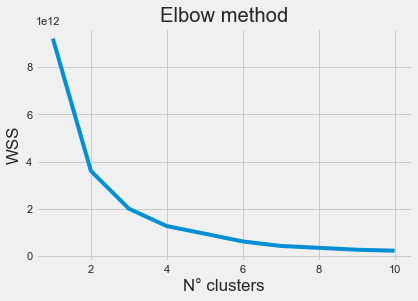

In [188]:
#This Elbow grafic especified the "best number of clusters for our data"
#In theory the average were we have the less changing is the best
#As we can see he will specify 10 clusters for our data

wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('N° clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [182]:
#Here we will predict 3 random points to see how kmeans would classify them

data = [
        [ 4.12, 3.4],
        [ 5.2, 5.8],
        [ 3.1, 3.5]
    ]
kmeans.predict(data)


array([6, 6, 6])

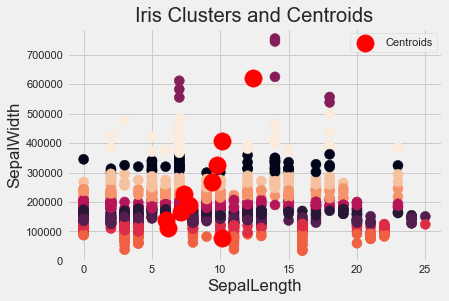

In [183]:
#Plotting the cluster centers
plt.scatter(X[:, 0], X[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Iris Clusters and Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()

plt.show()

In [184]:
#Here we will predict, from our data, how we can classify a house for his sale price em neighborhood
#Ans as we know kmeans function with the distance between the point(data) and the centers 
clusters = kmeans.predict(X)
clusters

array([7, 4, 7, ..., 8, 2, 2])

In [185]:
kmeans.cluster_centers_

array([[9.76119403e+00, 3.23941448e+05],
       [7.10822511e+00, 1.64601095e+05],
       [6.04487179e+00, 1.38222721e+05],
       [1.23750000e+01, 6.21146375e+05],
       [7.69339623e+00, 1.90398014e+05],
       [6.19158879e+00, 1.13295089e+05],
       [1.01188119e+01, 7.90005743e+04],
       [7.32500000e+00, 2.26492431e+05],
       [9.41592920e+00, 2.68483265e+05],
       [1.01428571e+01, 4.08508857e+05]])

In [186]:
train['Cluster Neighborhood'] = clusters

In [187]:
train.drop('Neighborhood',axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Cluster Neighborhood
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,7
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,4
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,1
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,7
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,8
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,2
